In [2]:
# Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Lab_Analyses.Spine_Analysis_v2 import spine_utilities as s_utils

sns.set()
sns.set_style("ticks")

In [3]:
## Specify data to load
mouse_id = "JW153"
days = ["Early"]
fov_type = "apical"

# Load the data
full_data = s_utils.load_spine_datasets(mouse_id, days, fov_type)

In [4]:
# Grab relevant data
data = full_data["FOV2_apical"]["Early"]

In [5]:
data.__dict__.keys()

dict_keys(['mouse_id', 'session', 'date', 'imaging_parameters', 'time', 'lever_force_resample', 'lever_force_smooth', 'lever_velocity_envelope', 'lever_active', 'rewarded_movement_force', 'rewarded_movement_binary', 'binary_cue', 'reward_delivery', 'punish_delivery', 'spine_flags', 'spine_groupings', 'spine_positions', 'spine_volume', 'corrected_spine_volume', 'spine_GluSnFr_dFoF', 'spine_GluSnFr_processed_dFoF', 'spine_GluSnFr_activity', 'spine_GluSnFr_floored', 'spine_calcium_dFoF', 'spine_calcium_processed_dFoF', 'spine_calcium_activity', 'spine_calcium_floored', 'movement_spines', 'reward_movement_spines', 'silent_spines', 'reward_silent_spines', 'dendrite_length', 'dendrite_calcium_dFoF', 'dendrite_calcium_processed_dFoF', 'dendrite_calcium_activity', 'dendrite_calcium_floored', 'movement_dendrites', 'reward_movement_dendrites', 'silent_dendrites', 'reward_silent_dendrites', 'poly_dendrite_positions', 'poly_dendrite_calcium_dFoF', 'poly_dendrite_calcium_processed_dFoF', 'followup_

In [6]:
# Get activity related data
spine_activity = data.spine_GluSnFr_activity
spine_dFoF = data.spine_GluSnFr_processed_dFoF
dendrite_activity = data.dendrite_calcium_activity
dendrite_dFoF = data.dendrite_calcium_processed_dFoF

In [7]:
# Mask active and inactive portions
def get_active_inactive(dFoF, active):
    inactive_mask = (active == 1)
    active_mask = (active == 0)
    active_dFoF = np.copy(dFoF)
    inactive_dFoF = np.copy(dFoF)
    active_dFoF[active_mask] = np.nan
    inactive_dFoF[inactive_mask] = np.nan
    
    return active_dFoF, inactive_dFoF

In [8]:
spine_active = np.zeros(spine_activity.shape) * np.nan
spine_inactive = np.zeros(spine_activity.shape) * np.nan
dend_active = np.zeros(dendrite_activity.shape) * np.nan
dend_inactive = np.zeros(dendrite_activity.shape) * np.nan

for i in range(spine_activity.shape[1]):
    s_active, s_inactive = get_active_inactive(spine_dFoF[:, i], spine_activity[:, i])
    d_active, d_inactive = get_active_inactive(dendrite_dFoF[:, i], dendrite_activity[:, i])
    spine_active[:, i] = s_active
    spine_inactive[:, i] = s_inactive
    dend_active[:, i] = d_active
    dend_inactive[:, i] = d_inactive

In [ ]:
# Explore the traces
%matplotlib qt

for i in range(spine_activity.shape[1]):
    plt.figure()
    plt.plot(spine_inactive[:, i], color="black")
    plt.plot(spine_active[:, i], color="blue")
    plt.ylim(bottom=-0.5, top=1.5)

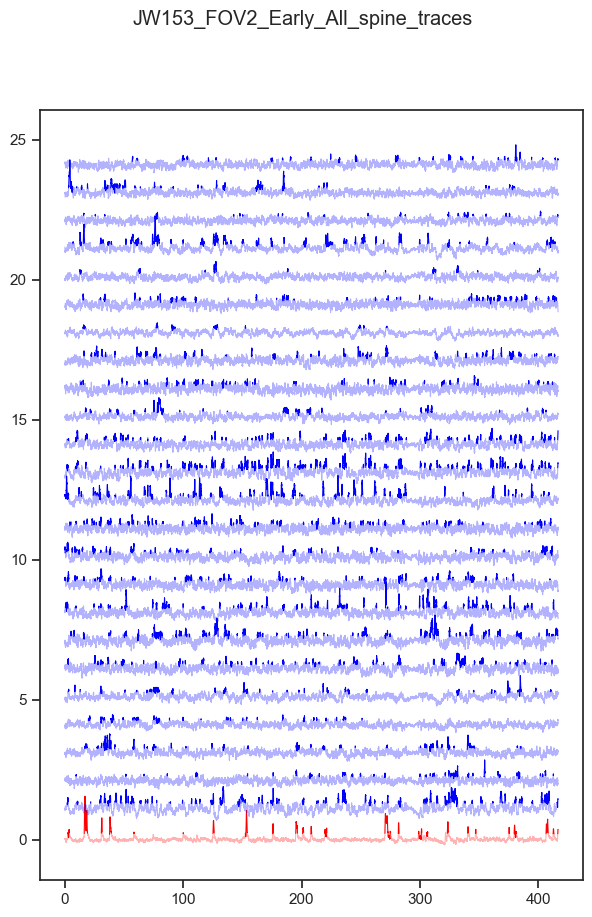

In [13]:
# Group plot
%matplotlib inline
save_path = r"C:\Users\Jake\Desktop\Figures\Examples\Example_traces\dual_GluSnFr_RCaMP"

x = np.arange(len(dend_inactive[20000:45000, 0])) / 60
fig, ax = plt.subplot_mosaic("""A""",figsize=(7,10))
title = "JW153_FOV2_Early_All_spine_traces"
fig.suptitle(title)
ax["A"].plot(x, dend_inactive[20000:45000, 0], color="red", alpha=0.3, linewidth=.8)
ax["A"].plot(x, dend_active[20000:45000, 0], color="red", linewidth=.8)

for i in reversed(range(spine_activity.shape[1])):
    ax["A"].plot(x, spine_inactive[20000:45000, i] + i +1.1, color="blue", alpha=0.3, linewidth=.8)
    ax["A"].plot(x, spine_active[20000:45000, i] + i + 1.1, color="blue", linewidth=.8)

fname = os.path.join(save_path, title)
fig.savefig(fname + ".pdf")